# Домашнее задание к лекции "Базовые понятия статистики"

## Обязательная часть
Будем осуществлять работу с непростым набором данных о состоянии здоровья лошадей, испытывающих кишечные колики.

## Задание 1. Базовое изучение

Изучить представленный набор данных на основе описания его столбцов и выбрать 8 столбцов для дальнейшего изучения (среди них должны быть как числовые, так и категориальные). Провести расчет базовых метрик для них, кратко описать результаты.

In [1]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
horse_data = pd.read_csv('C:/Users/skaup/Python learning/Netologia/Python/notebooks/14. Базовые понятия статистики/horse_data.csv', keep_default_na=False, na_values=['?'])
horse_data

,2,1,530101,38.50,66,28,3,3.1,?,2.1,...,45.00,8.40,?.4,?.5,2.2,2.3,11300,00000,00000.1,2.4
0,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
1,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
2,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
3,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
4,2.0,1,528355,NaN,NaN,NaN,2.0,1.0,3.0,1.0,...,NaN,NaN,NaN,NaN,1.0,2,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,1,533886,NaN,120.0,70.0,4.0,NaN,4.0,2.0,...,55.0,65.0,NaN,NaN,3.0,2,3205,0,0,2
295,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,...,44.0,NaN,3.0,3.3,3.0,1,2208,0,0,1
296,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,...,60.0,6.8,NaN,NaN,2.0,1,3205,0,0,2
297,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,...,50.0,6.0,3.0,3.4,1.0,1,2208,0,0,1


In [3]:
horse_data.columns =['Surgery', 'Age', 'Hospital_number', 'Rectal_temperature', 'Pulse', 'Respiratory_rate', 
                     'Temperature_of_extremities', 'Peripheral_pulse', 'Mucous_membranes', 'Capillary_refill_time',
                    'Pain', 'Peristalsis', 'Abdominal_distension', 'Nasogastric_tube', 'Nasogastric_reflux',
                    'Nasogastric_reflux_PH', 'Rectal_examination', 'Abdomen', 'Packed_cell_volume',
                    'Total_protein', 'Abdominocentesis_appearance', 'Abdomcentesis_total_protein', 'Outcome',
                    'Surgical_lesion', 'Type_of_lesion', 'Type_of_lesion', 'Type_of_lesion', 'cp_data']

horse_data

,Surgery,Age,Hospital_number,Rectal_temperature,Pulse,Respiratory_rate,Temperature_of_extremities,Peripheral_pulse,Mucous_membranes,Capillary_refill_time,...,Packed_cell_volume,Total_protein,Abdominocentesis_appearance,Abdomcentesis_total_protein,Outcome,Surgical_lesion,Type_of_lesion,Type_of_lesion,Type_of_lesion,cp_data
0,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
1,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
2,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
3,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
4,2.0,1,528355,NaN,NaN,NaN,2.0,1.0,3.0,1.0,...,NaN,NaN,NaN,NaN,1.0,2,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,1,533886,NaN,120.0,70.0,4.0,NaN,4.0,2.0,...,55.0,65.0,NaN,NaN,3.0,2,3205,0,0,2
295,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,...,44.0,NaN,3.0,3.3,3.0,1,2208,0,0,1
296,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,...,60.0,6.8,NaN,NaN,2.0,1,3205,0,0,2
297,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,...,50.0,6.0,3.0,3.4,1.0,1,2208,0,0,1


In [4]:
select_columns = [1,2,3,4,5,7,8,10]
horse_data_2 = horse_data.iloc[:, select_columns]

horse_data_2

,Age,Hospital_number,Rectal_temperature,Pulse,Respiratory_rate,Peripheral_pulse,Mucous_membranes,Pain
0,1,534817,39.2,88.0,20.0,NaN,4.0,3.0
1,1,530334,38.3,40.0,24.0,1.0,3.0,3.0
2,9,5290409,39.1,164.0,84.0,1.0,6.0,2.0
3,1,530255,37.3,104.0,35.0,NaN,6.0,NaN
4,1,528355,NaN,NaN,NaN,1.0,3.0,2.0
...,...,...,...,...,...,...,...,...
294,1,533886,NaN,120.0,70.0,NaN,4.0,2.0
295,1,527702,37.2,72.0,24.0,2.0,4.0,4.0
296,1,529386,37.5,72.0,30.0,3.0,4.0,4.0
297,1,530612,36.5,100.0,24.0,3.0,3.0,3.0


In [5]:
horse_data_2['Age'].describe()

count    299.00000
mean       1.64214
std        2.17730
min        1.00000
25%        1.00000
50%        1.00000
75%        1.00000
max        9.00000
Name: Age, dtype: float64

In [6]:
print('Значение моды: ', horse_data_2.Age.round().mode()[0])

Значение моды:  1


Взяли столбец "Age" - "Возраст". Всего подлежало обработке 299 строк.

Средний возраст лошадей - 1,64214 года

Минимальный возраст лошадей - 1 год, а максимальный - 9 лет. Среднеквадратичное отклонение 2,1773 года.

Самое часто встречающееся значение (мода) равна 1 году

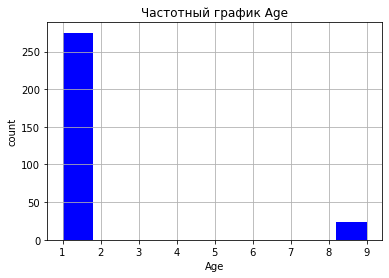

In [7]:
n = plt.hist(horse_data_2['Age'], 10, facecolor='b')

plt.xlabel('Age')
plt.ylabel('count')
plt.title('Частотный график Age')
plt.grid(True)
plt.show()

In [8]:
horse_data_2['Rectal_temperature'].describe()

count    239.000000
mean      38.166527
std        0.733508
min       35.400000
25%       37.800000
50%       38.200000
75%       38.500000
max       40.800000
Name: Rectal_temperature, dtype: float64

In [9]:
print('Значение моды: ', horse_data_2.Rectal_temperature.round().mode()[0])

Значение моды:  38.0


Взяли столбец "Rectal_temperature" - "Рекатльная температура". Всего подлежало обработке 299 строк.

Средняя температура - 38,166527 года

Минимальная температура - 35,4 градуса, а максимальная - 40,8 градусов. Среднеквадратичное отклонение 0,733508 градусов.

Самое часто встречающееся значение (мода) равна 38 градусов

C:\Users\skaup\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\skaup\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


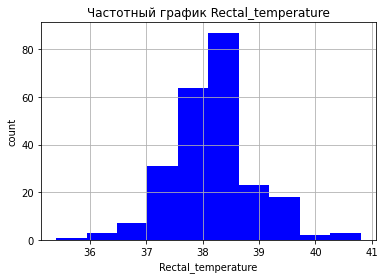

In [10]:
n = plt.hist(horse_data_2['Rectal_temperature'], 10, facecolor='b')

plt.xlabel('Rectal_temperature')
plt.ylabel('count')
plt.title('Частотный график Rectal_temperature')
plt.grid(True)
plt.show()

In [11]:
horse_data_2['Pulse'].describe()

count    275.000000
mean      71.934545
std       28.680522
min       30.000000
25%       48.000000
50%       64.000000
75%       88.000000
max      184.000000
Name: Pulse, dtype: float64

In [12]:
print('Мода: ', statistics.mode(horse_data_2['Pulse']))

Мода:  48.0


In [13]:
print('Значение моды: ', horse_data_2.Pulse.round().mode()[0])

Значение моды:  48.0


Взяли столбец "Pulse" - "Пульс". Всего подлежало обработке 299 строк. Из них заполнены 275 строк, по 24 строкам значения отсутствуют.

Средний пульс у лошадей - 71,934545 ударов в минуту

Минимальный пульс у лошадей - 30 ударов в минуту, а максимальный - 184 удара в минуту. Среднеквадратичное отклонение 28,680522 удара в минуту

Самое часто встречающееся значение (мода) равна 48 ударам в минуту

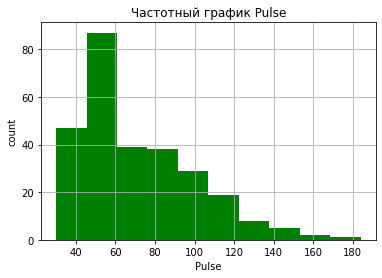

In [14]:
n = plt.hist(horse_data_2['Pulse'], 10, facecolor='g')

plt.xlabel('Pulse')
plt.ylabel('count')
plt.title('Частотный график Pulse')
plt.grid(True)
plt.show()

In [15]:
horse_data_2['Mucous_membranes'].describe()

count    253.000000
mean       2.853755
std        1.620294
min        1.000000
25%        1.000000
50%        3.000000
75%        4.000000
max        6.000000
Name: Mucous_membranes, dtype: float64

In [16]:
print('Мода: ', statistics.mode(horse_data_2['Mucous_membranes']))

Мода:  1.0


In [17]:
print('Значение моды: ', horse_data_2.Mucous_membranes.round().mode()[0])

Значение моды:  1.0


Взяли столбец "Mucous_membranes" - "Слизистые оболочки". Всего подлежало обработке 299 строк. Из них заполнены 253 строки, по 46 строкам значения отсутствуют.
Цифры обозначают субъективное измерение цвета
           - возможные значения:
                1 = нормальный розовый
                2 = ярко-розовый
                3 = бледно-розовый
                4 = бледно-синюшный
                5 = ярко-красный / инжектированный
                6 = темно-синюшный
           - 1 и 2, вероятно, указывают на нормальное или слегка повышенное
             обращение
           - 3 могут возникнуть при раннем шоке
           - 4 и 6 указывают на серьезное нарушение кровообращения
           - 5 больше указывает на сепсис
           
Из представленных данных видно, что в-среднем слизистые оболочки имеют значение 2,853755, что говорит о бледно-розовом цвете. Но самое часто встречающееся значение окраса слизистых оболочек имеет нормальный розовый цвет (мода=1).

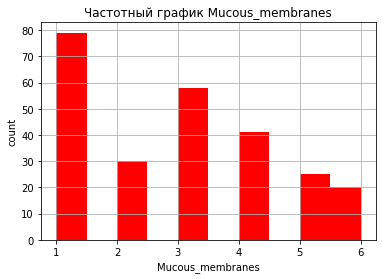

In [18]:
n = plt.hist(horse_data_2['Mucous_membranes'], 10, facecolor='r')

plt.xlabel('Mucous_membranes')
plt.ylabel('count')
plt.title('Частотный график Mucous_membranes')
plt.grid(True)
plt.show()

## Задание 2. Работа с выбросами

В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. Принять и обосновать решение о дальнейшей работе с ними.

### Выбросы по возрасту:

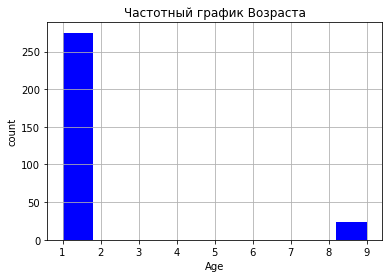

In [19]:
n = plt.hist(horse_data_2['Age'], 10, facecolor='b')

plt.xlabel('Age')
plt.ylabel('count')
plt.title('Частотный график Возраста')
plt.grid(True)
plt.show()

In [20]:
q1 = horse_data_2.Age.quantile(0.25)
q3 = horse_data_2.Age.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers_Age = horse_data_2[horse_data_2.Age.between(lower_bound, upper_bound, inclusive=True)].sort_values('Age')
remove_outliers_Age

,Age,Hospital_number,Rectal_temperature,Pulse,Respiratory_rate,Peripheral_pulse,Mucous_membranes,Pain
0,1,534817,39.2,88.0,20.0,NaN,4.0,3.0
188,1,5299603,38.3,60.0,16.0,1.0,1.0,2.0
189,1,528742,37.1,40.0,8.0,1.0,4.0,3.0
191,1,534788,38.2,48.0,18.0,1.0,1.0,3.0
192,1,529373,NaN,60.0,48.0,3.0,4.0,4.0
...,...,...,...,...,...,...,...,...
100,1,534899,NaN,60.0,20.0,3.0,4.0,5.0
99,1,535364,38.2,40.0,16.0,3.0,1.0,1.0
98,1,530002,39.6,108.0,51.0,3.0,6.0,2.0
105,1,528668,38.3,52.0,96.0,3.0,3.0,NaN


In [21]:
# Узнаем выбросы по возрасту лошадей:
pd.concat([horse_data_2, remove_outliers_Age]).drop_duplicates(keep=False)

,Age,Hospital_number,Rectal_temperature,Pulse,Respiratory_rate,Peripheral_pulse,Mucous_membranes,Pain
2,9,5290409,39.1,164.0,84.0,1.0,6.0,2.0
8,9,5299629,38.3,90.0,NaN,NaN,1.0,5.0
12,9,5291329,38.0,92.0,28.0,1.0,2.0,1.0
15,9,5301219,NaN,128.0,36.0,3.0,4.0,4.0
22,9,534998,38.3,130.0,60.0,3.0,NaN,2.0
38,9,5277409,39.2,146.0,96.0,NaN,NaN,NaN
40,9,5288249,39.0,150.0,72.0,NaN,NaN,NaN
54,9,5282839,38.6,160.0,20.0,NaN,5.0,3.0
73,9,5292929,NaN,NaN,NaN,NaN,NaN,NaN
74,9,534092,39.7,100.0,NaN,3.0,5.0,2.0


Итого 24 выброса - именно столько раз встречаются лошади возрастом 9 лет 

### Выбросы по ректальной температуре:

C:\Users\skaup\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\skaup\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


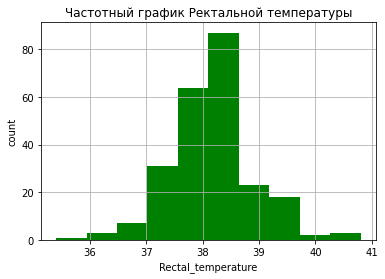

In [22]:
n = plt.hist(horse_data_2['Rectal_temperature'], 10, facecolor='g')

plt.xlabel('Rectal_temperature')
plt.ylabel('count')
plt.title('Частотный график Ректальной температуры')
plt.grid(True)
plt.show()

In [23]:
q1 = horse_data_2.Rectal_temperature.quantile(0.25)
q3 = horse_data_2.Rectal_temperature.quantile(0.9) # увеличиваем до 0,9, так как при 0,75 большое количество выбросов
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers_Rectal_temperature = horse_data_2[horse_data_2.Rectal_temperature.between(lower_bound, upper_bound, inclusive=True)].sort_values('Age')
remove_outliers_Rectal_temperature

,Age,Hospital_number,Rectal_temperature,Pulse,Respiratory_rate,Peripheral_pulse,Mucous_membranes,Pain
0,1,534817,39.2,88.0,20.0,NaN,4.0,3.0
189,1,528742,37.1,40.0,8.0,1.0,4.0,3.0
191,1,534788,38.2,48.0,18.0,1.0,1.0,3.0
193,1,534163,37.9,88.0,24.0,1.0,2.0,2.0
194,1,533697,38.0,44.0,12.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...
261,9,5305629,38.6,88.0,28.0,NaN,NaN,NaN
22,9,534998,38.3,130.0,60.0,3.0,NaN,2.0
54,9,5282839,38.6,160.0,20.0,NaN,5.0,3.0
40,9,5288249,39.0,150.0,72.0,NaN,NaN,NaN


In [24]:
# Узнаем выбросы по ректальной температуре лошадей:
pd.concat([horse_data_2, remove_outliers_Rectal_temperature]).drop_duplicates(keep=False)

,Age,Hospital_number,Rectal_temperature,Pulse,Respiratory_rate,Peripheral_pulse,Mucous_membranes,Pain
4,1,528355,NaN,NaN,NaN,1.0,3.0,2.0
6,1,529607,NaN,60.0,NaN,NaN,NaN,NaN
7,1,530051,NaN,80.0,36.0,4.0,3.0,4.0
15,9,5301219,NaN,128.0,36.0,3.0,4.0,4.0
27,1,5279442,NaN,NaN,NaN,NaN,NaN,NaN
34,1,528812,NaN,104.0,24.0,3.0,3.0,4.0
39,1,529498,NaN,88.0,NaN,3.0,6.0,5.0
42,1,534069,NaN,120.0,NaN,4.0,4.0,4.0
43,1,535407,35.4,140.0,24.0,3.0,4.0,4.0
44,1,529827,NaN,120.0,NaN,3.0,4.0,5.0


Итого 1 выброс по ректальной температуре: 35.4

### Выбросы по пульсу:

C:\Users\skaup\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\skaup\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


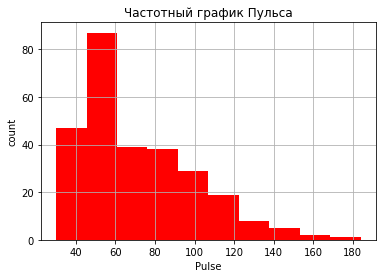

In [25]:
n = plt.hist(horse_data_2['Pulse'], 10, facecolor='r')

plt.xlabel('Pulse')
plt.ylabel('count')
plt.title('Частотный график Пульса')
plt.grid(True)
plt.show()

In [26]:
q1 = horse_data_2.Pulse.quantile(0.25)
q3 = horse_data_2.Pulse.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers_Pulse = horse_data_2[horse_data_2.Pulse.between(lower_bound, upper_bound, inclusive=True)].sort_values('Pulse')
remove_outliers_Pulse

,Age,Hospital_number,Rectal_temperature,Pulse,Respiratory_rate,Peripheral_pulse,Mucous_membranes,Pain
129,1,528964,37.8,30.0,12.0,NaN,NaN,NaN
231,1,5262543,38.5,30.0,18.0,NaN,NaN,NaN
275,1,534787,38.0,36.0,16.0,1.0,1.0,4.0
202,1,529685,37.2,36.0,9.0,1.0,1.0,2.0
241,1,530354,NaN,36.0,32.0,1.0,4.0,5.0
...,...,...,...,...,...,...,...,...
147,1,529272,38.3,132.0,NaN,3.0,6.0,2.0
134,9,5287179,38.1,136.0,48.0,3.0,3.0,5.0
43,1,535407,35.4,140.0,24.0,3.0,4.0,4.0
102,9,5292489,38.0,140.0,68.0,1.0,1.0,3.0


In [27]:
# Узнаем выбросы по пульсу лошадей:
pd.concat([horse_data_2, remove_outliers_Pulse]).drop_duplicates(keep=False)

,Age,Hospital_number,Rectal_temperature,Pulse,Respiratory_rate,Peripheral_pulse,Mucous_membranes,Pain
2,9,5290409,39.1,164.0,84.0,1.0,6.0,2.0
4,1,528355,NaN,NaN,NaN,1.0,3.0,2.0
27,1,5279442,NaN,NaN,NaN,NaN,NaN,NaN
40,9,5288249,39.0,150.0,72.0,NaN,NaN,NaN
51,1,529483,NaN,NaN,NaN,1.0,3.0,1.0
54,9,5282839,38.6,160.0,20.0,NaN,5.0,3.0
55,1,528872,NaN,NaN,NaN,NaN,NaN,NaN
57,1,528298,NaN,NaN,20.0,3.0,3.0,5.0
73,9,5292929,NaN,NaN,NaN,NaN,NaN,NaN
92,1,530310,NaN,NaN,NaN,3.0,1.0,5.0


Итого 5 выбросов по пульсу: 150 дважды, 160 и 184 дважды

### Выбросы по частоте дыхания:

C:\Users\skaup\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\skaup\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


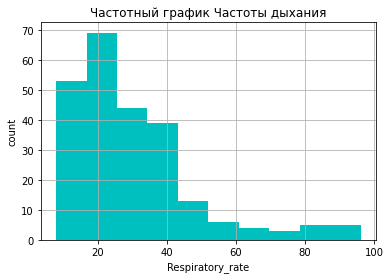

In [28]:
n = plt.hist(horse_data_2['Respiratory_rate'], 10, facecolor='c')

plt.xlabel('Respiratory_rate')
plt.ylabel('count')
plt.title('Частотный график Частоты дыхания')
plt.grid(True)
plt.show()

In [29]:
q1 = horse_data_2.Respiratory_rate.quantile(0.2)
q3 = horse_data_2.Respiratory_rate.quantile(0.85)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers_Respiratory_rate = horse_data_2[horse_data_2.Respiratory_rate.between(lower_bound, upper_bound, inclusive=True)].sort_values('Age')
remove_outliers_Respiratory_rate

,Age,Hospital_number,Rectal_temperature,Pulse,Respiratory_rate,Peripheral_pulse,Mucous_membranes,Pain
0,1,534817,39.2,88.0,20.0,NaN,4.0,3.0
192,1,529373,NaN,60.0,48.0,3.0,4.0,4.0
193,1,534163,37.9,88.0,24.0,1.0,2.0,2.0
194,1,533697,38.0,44.0,12.0,1.0,1.0,NaN
195,1,529628,38.5,60.0,20.0,1.0,5.0,2.0
...,...,...,...,...,...,...,...,...
190,9,5287279,NaN,100.0,44.0,1.0,1.0,4.0
22,9,534998,38.3,130.0,60.0,3.0,NaN,2.0
274,9,5297159,38.8,150.0,50.0,3.0,6.0,5.0
12,9,5291329,38.0,92.0,28.0,1.0,2.0,1.0


In [30]:
# Узнаем выбросы по частоте дыхания лошадей:
pd.concat([horse_data_2, remove_outliers_Respiratory_rate]).drop_duplicates(keep=False)

,Age,Hospital_number,Rectal_temperature,Pulse,Respiratory_rate,Peripheral_pulse,Mucous_membranes,Pain
2,9,5290409,39.1,164.0,84.0,1.0,6.0,2.0
4,1,528355,NaN,NaN,NaN,1.0,3.0,2.0
6,1,529607,NaN,60.0,NaN,NaN,NaN,NaN
8,9,5299629,38.3,90.0,NaN,NaN,1.0,5.0
27,1,5279442,NaN,NaN,NaN,NaN,NaN,NaN
28,1,535415,37.7,48.0,NaN,1.0,1.0,1.0
31,1,529427,37.2,60.0,NaN,1.0,1.0,3.0
36,1,533847,37.8,72.0,NaN,3.0,NaN,5.0
37,1,528996,38.6,52.0,NaN,1.0,1.0,3.0
38,9,5277409,39.2,146.0,96.0,NaN,NaN,NaN


Итого 7 выбросов: 84 дважды, 88, 90 дважды, 96 дважды

## Задание 3. Работа с пропусками

Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.

In [31]:
for col in horse_data_2.columns:
    gap = horse_data_2[col].isnull().mean()
    print(f'{col} - {gap :.1%}')

Age - 0.0%
Hospital_number - 0.0%
Rectal_temperature - 20.1%
Pulse - 8.0%
Respiratory_rate - 19.4%
Peripheral_pulse - 23.1%
Mucous_membranes - 15.4%
Pain - 18.4%


Количество пропусков у столбцов:

Rectal_temperature - 20.1% - пропуски можно заменить медианным значением, так как есть выбросы

Pulse - 8.0% - пропуски можно заменить медианным значением, так как есть выбросы

Respiratory_rate - 19.4% - пропуски можно заменить медианным значением, так как есть выбросы

Peripheral_pulse - 23.1% - пропуски можно заменить средним значением

Mucous_membranes - 15.4% - пропуски можно заменить средним значением

Pain - 18.4% - пропуски можно заменить средним значением

In [32]:
# Смотрим количественное значение пропусков:

horse_data_2.isnull().sum()

Age                    0
Hospital_number        0
Rectal_temperature    60
Pulse                 24
Respiratory_rate      58
Peripheral_pulse      69
Mucous_membranes      46
Pain                  55
dtype: int64

In [33]:
horse_data_2['Rectal_temperature'].fillna((horse_data_2['Rectal_temperature'].median()), inplace=True)
horse_data_2['Pulse'].fillna((horse_data_2['Pulse'].median()), inplace=True)
horse_data_2['Respiratory_rate'].fillna((horse_data_2['Respiratory_rate'].median()), inplace=True)
horse_data_2['Peripheral_pulse'].fillna((horse_data_2['Peripheral_pulse'].mean()), inplace=True)
horse_data_2['Mucous_membranes'].fillna((horse_data_2['Mucous_membranes'].mean()), inplace=True)
horse_data_2['Pain'].fillna((horse_data_2['Pain'].mean()), inplace=True)
horse_data_2

C:\Users\skaup\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Age,Hospital_number,Rectal_temperature,Pulse,Respiratory_rate,Peripheral_pulse,Mucous_membranes,Pain
0,1,534817,39.2,88.0,20.0,2.013043,4.000000,3.000000
1,1,530334,38.3,40.0,24.0,1.000000,3.000000,3.000000
2,9,5290409,39.1,164.0,84.0,1.000000,6.000000,2.000000
3,1,530255,37.3,104.0,35.0,2.013043,6.000000,2.942623
4,1,528355,38.2,64.0,24.0,1.000000,3.000000,2.000000
...,...,...,...,...,...,...,...,...
294,1,533886,38.2,120.0,70.0,2.013043,4.000000,2.000000
295,1,527702,37.2,72.0,24.0,2.000000,4.000000,4.000000
296,1,529386,37.5,72.0,30.0,3.000000,4.000000,4.000000
297,1,530612,36.5,100.0,24.0,3.000000,3.000000,3.000000
